In [1]:
import nltk
from bs4 import BeautifulSoup

nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
import ebooklib
from ebooklib import epub
from glob import glob
sources = list(glob('data/*.epub'))

def chapter_to_paragraphs(chapter):
    soup = BeautifulSoup(chapter.get_body_content(), 'html.parser')
    text = [para.get_text() for para in soup.find_all('p')]
    return text

#sources

[nltk_data] Downloading package punkt to /home/carl/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/carl/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /home/carl/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /home/carl/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
test_source = 'data/24_fifth_elephant.epub'

In [3]:
from pathlib import Path
base_title = Path(test_source).stem
book = epub.read_epub(test_source)
chapters = {}
for doc in book.get_items_of_type(ebooklib.ITEM_DOCUMENT):
    print(doc.get_name())
    if 'part' in doc.get_name():
        chapters[doc.get_name()] = chapter_to_paragraphs(doc)
        continue
    # res = nltk.word_tokenize(str(doc.content))
    # text += " ".join([r for r in res if r.isalnum()])
print(chapters.keys())

OEBPS/part1.xhtml
OEBPS/part10.xhtml
OEBPS/part11.xhtml
OEBPS/part12.xhtml
OEBPS/part13.xhtml
OEBPS/part14.xhtml
OEBPS/part15.xhtml
OEBPS/part16.xhtml
OEBPS/part2.xhtml
OEBPS/part3.xhtml
OEBPS/part4.xhtml
OEBPS/part5.xhtml
OEBPS/part6.xhtml
OEBPS/part7.xhtml
OEBPS/part8.xhtml
OEBPS/part9.xhtml
OEBPS/title.xhtml
titlepage.xhtml
dict_keys(['OEBPS/part1.xhtml', 'OEBPS/part10.xhtml', 'OEBPS/part11.xhtml', 'OEBPS/part12.xhtml', 'OEBPS/part13.xhtml', 'OEBPS/part14.xhtml', 'OEBPS/part15.xhtml', 'OEBPS/part16.xhtml', 'OEBPS/part2.xhtml', 'OEBPS/part3.xhtml', 'OEBPS/part4.xhtml', 'OEBPS/part5.xhtml', 'OEBPS/part6.xhtml', 'OEBPS/part7.xhtml', 'OEBPS/part8.xhtml', 'OEBPS/part9.xhtml'])


In [4]:
import nltk

from nltk import ne_chunk, pos_tag, word_tokenize
from nltk.tree import Tree

def get_names(text):
    nltk_results = ne_chunk(pos_tag(word_tokenize(text)))
    for nltk_result in nltk_results:
        if type(nltk_result) == Tree:
            name = ''
            for nltk_result_leaf in nltk_result.leaves():
                name += nltk_result_leaf[0] + ' '
            print ('Type: ', nltk_result.label(), 'Name: ', name)
            
def get_persons(text):
    people = set()
    nltk_results = ne_chunk(pos_tag(word_tokenize(text)))
    for nltk_result in nltk_results:
        if type(nltk_result) == Tree:
            name = ''
            for nltk_result_leaf in nltk_result.leaves():
                name += nltk_result_leaf[0] + ' '
            if nltk_result.label() == 'PERSON':
                people.add(name)
    return people
            
            
sample_paragraphs = list(chapters.values())[0]




for s in sample_paragraphs[-10:]:
    print('\n\n\n',s,'\n')
    #print(sample_text)

    get_names(s)
    print(get_persons(s))




 'It's fifteen hundred years old,' said Carrot, with something like awe in his voice. 

Type:  PERSON Name:  Carrot 
{'Carrot '}



 'I thought this was the replica.' 

set()



 'Well, yes . . . but it's a replica of a very important thing, sir,' said Carrot. 

Type:  PERSON Name:  Carrot 
{'Carrot '}



 Vimes sniffed. The air had a certain pungent quality. 'Smells strongly of cats in here, 
        doesn't it?' 

set()



 'I'm afraid they get in after the rats, sir. A rat who's nibbled on dwarf bread tends not 
        to be able to run very fast.' 

set()



 Vimes lit a cigar. Carrot gave it a look of uncertain disapproval. 'We do thank people for 
        not smoking in here, sir,' he said. 

Type:  PERSON Name:  Carrot 
{'Carrot '}



 'Why? You don't know they're not going to,' said Vimes. He leaned against the display 
        cabinet. 'All right, captain. Why am I really going to . . . Bonk? I don't know a lot 
        about diplomacy, but I do know it's never just about 

In [5]:
display([len(l) for l in chapters.values()])
from collections import Counter
from itertools import combinations

def process_chapter(chapter):

    people_counter = Counter()
    combo_counter = Counter()

    def get_connections(paragraph):
        people = get_persons(paragraph)
        if not people: return
        for p in people:
            people_counter.update([p])

        for combo in combinations(people,2):
            combo_counter.update([combo])


    for p in chapter:
        # print(p)
        get_connections(p)
    return people_counter.copy(),combo_counter.copy()
    
people_counter_chap1, combo_counter_chap1 = process_chapter(sample_paragraphs)
print('People counter:', people_counter_chap1)
print('Combo counter:' ,combo_counter_chap1)

[372, 313, 354, 362, 375, 349, 358, 52, 344, 338, 393, 417, 376, 370, 384, 397]

People counter: Counter({'Vimes ': 38, 'Carrot ': 34, 'Nobby ': 17, 'Colon ': 10, 'Angua ': 10, 'Vetinari ': 9, 'All ': 7, 'Lord Vetinari ': 7, 'Jolson ': 6, 'Fred ': 4, 'Guild ': 4, 'Uberwald ': 4, 'Duncan ': 4, 'Sergeant Colon ': 3, 'Fred Colon ': 3, 'Bonk ': 3, 'Sybil ': 3, 'Mister Jolson ': 2, 'Chert ': 2, 'Watch ': 2, 'Lady Sybil ': 2, 'Terry Pratchett ': 1, 'Things ': 1, 'Broad Way ': 1, 'Snow ': 1, 'Sam ': 1, 'Captain Carrot Ironfoundersson ': 1, 'Bucket ': 1, 'Captain Carrot ': 1, 'Someone ': 1, 'Bluejohn ': 1, 'Agi ': 1, 'Agi Hammerthief ': 1, 'Sweet Fanny Adams ': 1, 'Beyonk ': 1, 'Borogravia ': 1, 'Genua ': 1, 'Detritus ': 1, 'Incidentally ': 1, 'Coalface ': 1, 'Crunchie Ron ': 1, 'Corporal Nobbs ': 1, 'Mister Vimes ': 1, 'Good ': 1, 'Eau ': 1, 'Nobbs ': 1, 'Equal Heights ': 1, 'Dwarfs ': 1, 'Dwarf ': 1, 'Otherwise ': 1})
Combo counter: Counter({('Vimes ', 'Carrot '): 7, ('Angua ', 'Nobby '): 4, ('All ', 'Colon '): 2, ('Bonk ', 'Vimes '): 2, ('All ', 'Mister Jolson '): 1, ('

In [6]:
from tqdm import tqdm
people_counters = {}
combo_counters = {}
pb = tqdm(chapters.items())
for chapter_name, paragraphs in pb:
    people_counters[chapter_name], combo_counters[chapter_name] = process_chapter(paragraphs)
    

100%|███████████████████████████████████████████████████████████████████████████████████| 16/16 [00:39<00:00,  2.47s/it]


In [7]:

outdir = Path('data') /'processed' / base_title
if  not outdir.exists(): outdir.mkdir(parents=True)
print(outdir.exists())

True


In [8]:
import pandas as pd
import matplotlib.pyplot as plt



df = pd.DataFrame(people_counters.values(), (f'Chapter {i}' for i, _ in enumerate(people_counters.keys()))).fillna(0)
select_cols = df.sum(axis=0)>10
filtered_people = df.loc[:,select_cols].copy()

df.to_csv(outdir/f"{base_title}_people.csv")
#filtered_people.plot()

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(combo_counters.values(), (f'Chapter {i}' for i, _ in enumerate(combo_counters.keys()))).fillna(0)
df.to_csv(outdir/f"{base_title}_combos.csv")
display(df.head())
select_cols = df.sum(axis=0)>3
filtered_combos = df.loc[:,select_cols].copy()
#filtered_combos.plot()

,"(All , Mister Jolson )","(Jolson , Sergeant Colon )","(Jolson , Fred )","(Jolson , Colon )","(Sergeant Colon , Fred )","(Sergeant Colon , Colon )","(Fred , Colon )","(All , Fred )","(All , Colon )","(Watch , Sam )",...,"(Hard Knocks , Inigo Skimmer )","(Sam Vimes , Downtown Bonk )","(Vimes , Downtown Bonk )","(Lady Sybil , Downtown Bonk )","(Vimes , Ideas Taster )","(Ideas Taster , Lady Sybil )","(Dee , Sam )","(Bloodaxe , Lady Sybil )","(Vimes , Water )","(Dee , Longfinger )"
Chapter 0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chapter 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chapter 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chapter 3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chapter 4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
import networkx as nx
from itertools import chain

g = nx.Graph()

people_from_combos = set(chain(*[[*c] for c in filtered_combos.columns]))
print(people_from_combos)
g.add_nodes_from([(p,{'label':p}) for p in people_from_combos])

summed_weights = filtered_combos.sum(axis=0)

print(summed_weights)

edges_with_weights = [(*edge,weight) for edge, weight  in zip(summed_weights.index, summed_weights.values)]
print(edges_with_weights)


g.add_weighted_edges_from(edges_with_weights)




{'Lady Margolotta ', 'Sybil ', 'Sam ', 'Lord ', 'Vetinari ', 'Sam Vimes ', 'Cheery ', 'Wolf ', 'Carrot ', 'Leonard ', 'Nobby ', 'Igor ', 'Gavin ', 'Gaspode ', 'Reg ', 'Shoe ', 'Dee ', 'Margolotta ', 'Vimes ', 'Serafine ', 'Inigo ', 'Detritus ', 'Lady Sybil ', 'Mister Vimes ', 'Sir Samuel ', 'Lady ', 'Wolfgang ', 'Tantony ', 'Angua '}
(Vimes , Carrot )                  22.0
(Angua , Nobby )                    5.0
(Vimes , Cheery )                   7.0
(Dee , Vimes )                     11.0
(Vimes , Sybil )                   14.0
(Vimes , Nobby )                    5.0
(Vimes , Wolf )                     5.0
(Sam , Sybil )                     12.0
(Vimes , Detritus )                 9.0
(Vimes , Inigo )                   15.0
(Margolotta , Lady )               10.0
(Vimes , Angua )                   11.0
(Lord , Vetinari )                  9.0
(Wolfgang , Vimes )                 7.0
(Gavin , Carrot )                   5.0
(Angua , Gavin )                    6.0
(Vimes , Gavin )        

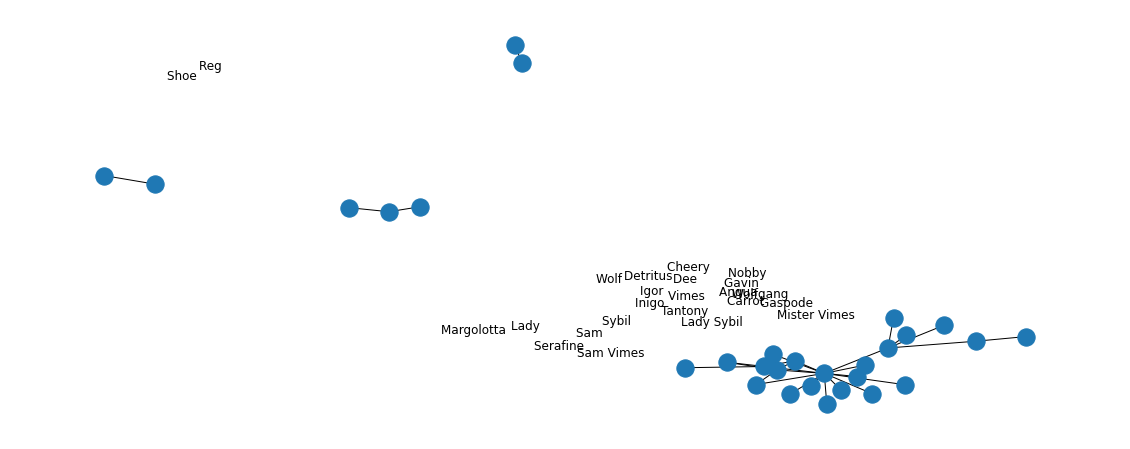

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot()

nx.draw(g,ax=ax, pos=nx.spring_layout(g))
nx.draw_networkx_labels(g,pos=nx.spring_layout(g),ax=ax)
plt.show()








nx.write_gexf(g, outdir/f"{base_title}.gexf")
